In [2]:
%load_ext autoreload
%autoreload 2  
%reload_ext autoreload

In [3]:
import os
import numpy as np
import pickle
import matplotlib.pyplot as plt

from bgspy.likelihood import SimplexModel
from bgspy.utils import load_pickle
from bgspy.optim import optim_plot

/home/vsb/projects/bprime/bgspy/likelihood.py:6: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  import tqdm.autonotebook as tqdm


In [4]:
plt.show()
plt.rcParams['figure.figsize'] = [8, 4]
plt.rcParams['figure.dpi'] = 200
plt.style.use('./buffalo.mplstyle')

# MLE Diagnostics

In [5]:
fd = load_pickle('../fits/hg38_cds_utrs_phastcons_simplex/model_data.pkl')
fmd = load_pickle('../fits/hg38_cds_utrs_phastcons_merged_simplex/model_data.pkl')

In [5]:
gm, Y, bgs_bins, features, bp = fd['gm'], fd['Y'], fd['bgs_bins'], fd['gm'], fd['bp']

In [6]:
gm, Y, bgs_bins, features, bp = fmd['gm'], fmd['Y'], fmd['bgs_bins'], fmd['gm'], fmd['bp']

In [7]:
features = gm.features

In [8]:
m_b = SimplexModel(w=gm.w, t=gm.t, logB=bp, Y=Y,
                   bins=bgs_bins, features=features) 

In [9]:
m_b

MLE (interpolated w): 6 x 7 x 1
  w grid: [1.000e-11 6.310e-11 3.981e-10 2.512e-09 1.585e-08 1.000e-07] (before interpolation)
  t grid: [1.e-07 1.e-06 1.e-05 1.e-04 1.e-03 1.e-02 1.e-01]

In [ ]:
%%time 
m_b.fit(ncores=80, starts=100, start_pi0=0.001, start_mu=1.5e-8, algo='GN_ISRES')

Exception ignored in: <function _releaseLock at 0x7fb7e57c6790>
Traceback (most recent call last):
  File "/home/vsb/miniconda3/envs/bprime/lib/python3.8/logging/__init__.py", line 227, in _releaseLock
    def _releaseLock():
KeyboardInterrupt: 
Process ForkPoolWorker-296:
Process ForkPoolWorker-326:
Process ForkPoolWorker-300:
Process ForkPoolWorker-332:
Process ForkPoolWorker-323:
Process ForkPoolWorker-308:
Process ForkPoolWorker-319:
Process ForkPoolWorker-327:
Process ForkPoolWorker-333:
Process ForkPoolWorker-328:
Process ForkPoolWorker-306:
Process ForkPoolWorker-303:
Process ForkPoolWorker-309:
Process ForkPoolWorker-298:
Process ForkPoolWorker-299:
Process ForkPoolWorker-329:
Process ForkPoolWorker-312:
Process ForkPoolWorker-316:
Process ForkPoolWorker-331:
Process ForkPoolWorker-292:
Process ForkPoolWorker-291:
Process ForkPoolWorker-297:
Process ForkPoolWorker-314:
Process ForkPoolWorker-310:
Process ForkPoolWorker-307:
Process ForkPoolWorker-320:
Process ForkPoolWorker-302

In [57]:
m_b

ERROR! Session/line number was not unique in database. History logging moved to new session 2525


MLE (interpolated w): 6 x 7 x 1
  w grid: [1.000e-11 6.310e-11 3.981e-10 2.512e-09 1.585e-08 1.000e-07] (before interpolation)
  t grid: [1.e-07 1.e-06 1.e-05 1.e-04 1.e-03 1.e-02 1.e-01]

Simplex model ML estimates:
negative log-likelihood: 322778986520.9623
π0 = 0.0015824358718647073
μ = 3.281030904802272e-08
R² = 66.6248
W = 
          undefined
------  -----------
1e-07         0.071
1e-06         0.014
1e-05         0
0.0001        0
0.001         0.196
0.01          0.079
0.1           0.639

In [50]:
m_b

MLE (interpolated w): 6 x 7 x 1
  w grid: [1.000e-11 6.310e-11 3.981e-10 2.512e-09 1.585e-08 1.000e-07] (before interpolation)
  t grid: [1.e-07 1.e-06 1.e-05 1.e-04 1.e-03 1.e-02 1.e-01]

Simplex model ML estimates:
negative log-likelihood: 322778986520.9623
π0 = 0.0015824358718647073
μ = 3.281030904802272e-08
R² = 66.6248
W = 
          undefined
------  -----------
1e-07         0.071
1e-06         0.014
1e-05         0
0.0001        0
0.001         0.196
0.01          0.079
0.1           0.639

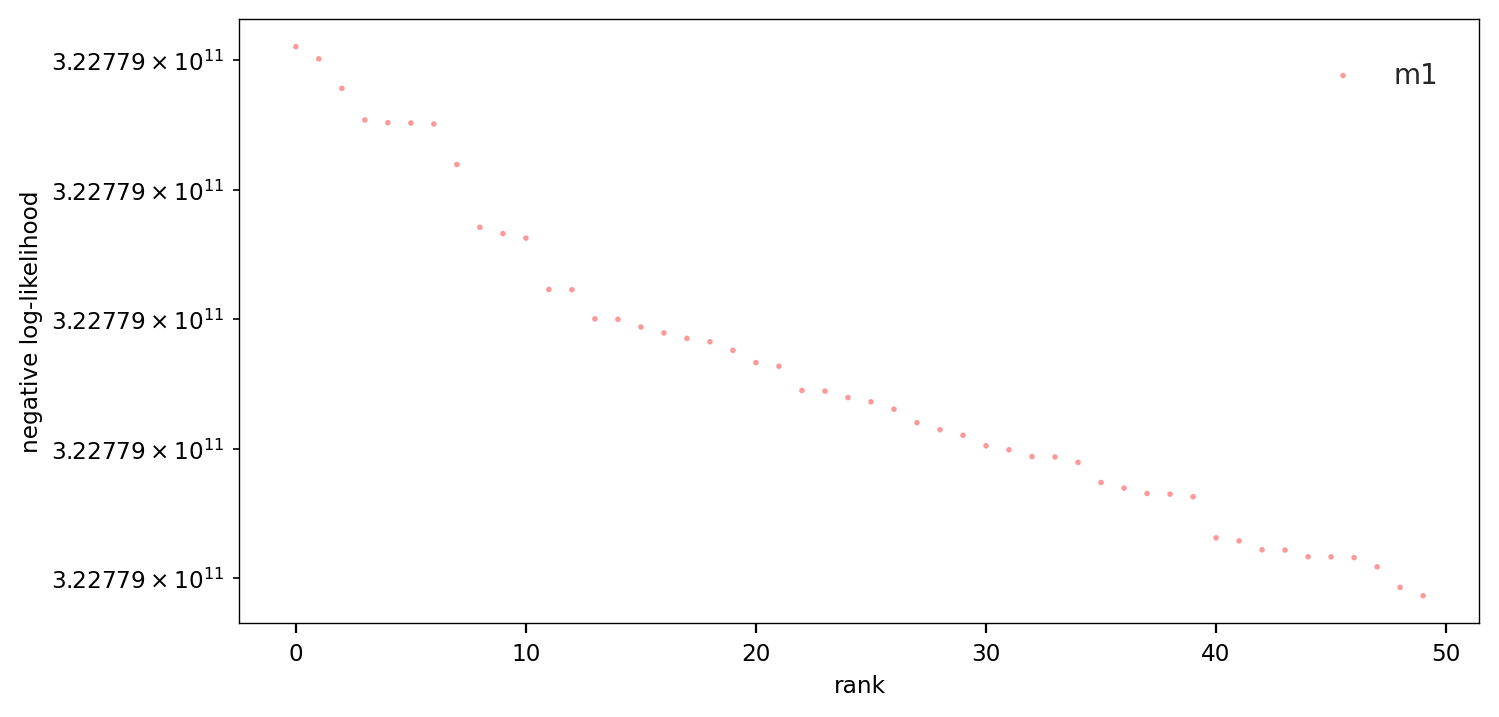

In [56]:
optim_plot(m1=m_b.optim)

In [32]:
10**np.array(tuple(np.log10((0.0005, 0.005))))

array([0.0005, 0.005 ])

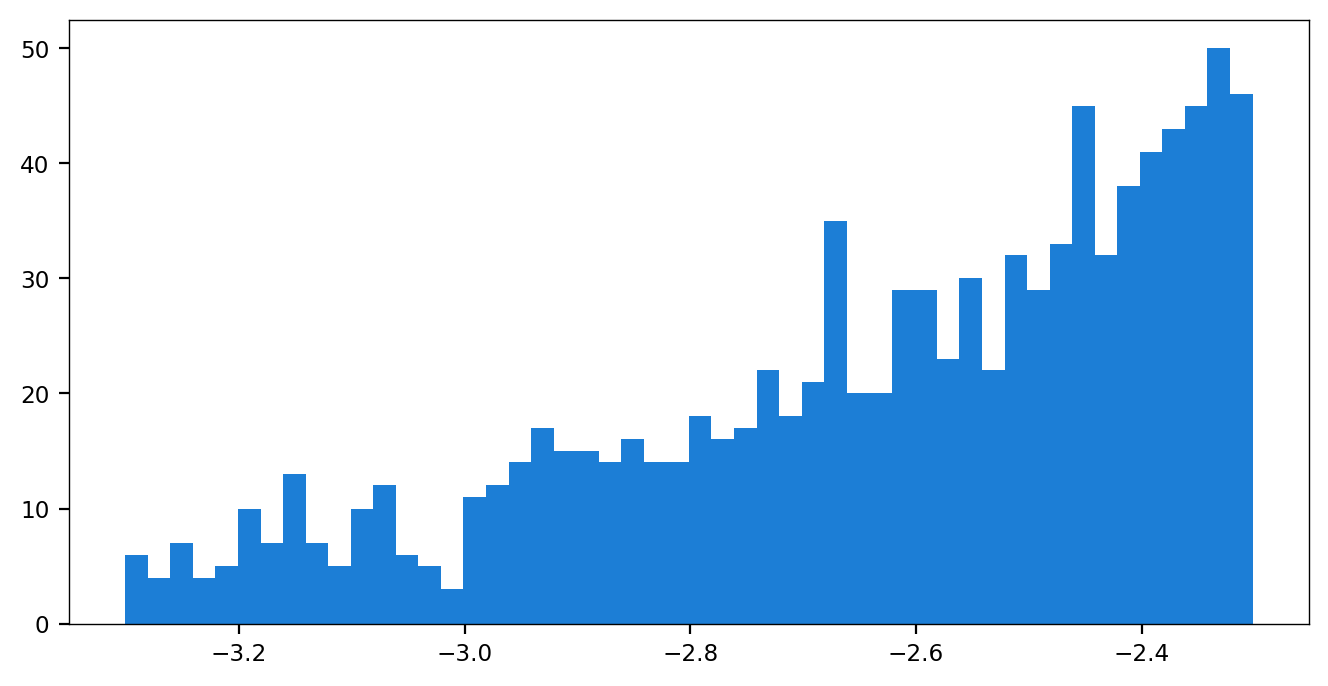

In [44]:
_ = plt.hist(np.log10([m_b.random_start()[0] for x in range(1000)]), 50)

In [39]:
from bgspy.data import pi_from_pairwise_summaries
pi_from_pairwise_summaries(Y.sum(axis=0))

0.001052746703898515

In [18]:
m_b

MLE (interpolated w): 6 x 7 x 1
  w grid: [1.000e-11 6.310e-11 3.981e-10 2.512e-09 1.585e-08 1.000e-07] (before interpolation)
  t grid: [1.e-07 1.e-06 1.e-05 1.e-04 1.e-03 1.e-02 1.e-01]

Simplex model ML estimates:
negative log-likelihood: 322791293316.3191
π0 = 0.0015787476785369746
μ = 6.407820745658771e-08
R² = 66.2317
W = 
          undefined
------  -----------
1e-07         0.022
1e-06         0.393
1e-05         0.127
0.0001        0
0.001         0.064
0.01          0.112
0.1           0.281

In [21]:
m_b

MLE (interpolated w): 6 x 7 x 3
  w grid: [1.000e-11 6.310e-11 3.981e-10 2.512e-09 1.585e-08 1.000e-07] (before interpolation)
  t grid: [1.e-07 1.e-06 1.e-05 1.e-04 1.e-03 1.e-02 1.e-01]

Simplex model ML estimates:
negative log-likelihood: 322741693444.99133
π0 = 0.001559728773284351
μ = 3.855877895183788e-08
R² = 67.8068
W = 
          cds    phastcons    utr
------  -----  -----------  -----
1e-07   0.32         0.055  0.241
1e-06   0.228        0.007  0.202
1e-05   0.008        0.003  0.133
0.0001  0.001        0.001  0.02
0.001   0.001        0.148  0.063
0.01    0.266        0.414  0.196
0.1     0.177        0.372  0.146

In [10]:
%%time
m_b.fit(ncores=70, starts=100, algo='GN_ISRES')

  0%|          | 0/100 [00:00<?, ?it/s]

Process ForkPoolWorker-140:
Process ForkPoolWorker-136:
Process ForkPoolWorker-117:
Process ForkPoolWorker-88:
Process ForkPoolWorker-125:


KeyboardInterrupt: 